In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from math import sqrt
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

In [2]:
# read data
data = pd.read_csv('INF2178_A4_data.csv')
data.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [3]:
data.describe()

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,190.421769,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,371.000000,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
# Dropping 'Unnamed: 0', 'Subject ID', 'MRI ID', 'Hand' columns
data = data.drop(columns=['Unnamed: 0', 'MRI ID', 'Hand'])
# Checking for missing values
data.isnull().sum()

Subject ID     0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [5]:
# drop na 
data.dropna(inplace=True)
data.isnull().sum()

Subject ID    0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [6]:
# Replace 'Nondemented' with 0 and 'Demented' with 1 in the 'Group' column
data['Group'] = data['Group'].replace({'Nondemented': 0, 'Demented': 1, 'Converted': 2})
# rename M/F to a resonable name as Gender, set 'F' with 0 and 'M' with 1 in the 'Group' column
data.rename(columns={'M/F':'Gender'}, inplace=True)
data['Gender'] = data['Gender'].replace({'M': 1, 'F': 0})
data

,Subject ID,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
4,OAS2_0004,0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,OAS2_0004,0,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,OAS2_0005,0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,OAS2_0184,1,2,553,0,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,OAS2_0185,1,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,OAS2_0185,1,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,OAS2_0186,0,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331


In [7]:
# group data by different 'Nondemented': 0, 'Demented': 1, 'Converted': 2
grouped_data= data.groupby('Group')
grouped_data

In [8]:
count_values = grouped_data.size()
count_values

Group
0    142
1    111
2     26
dtype: int64

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


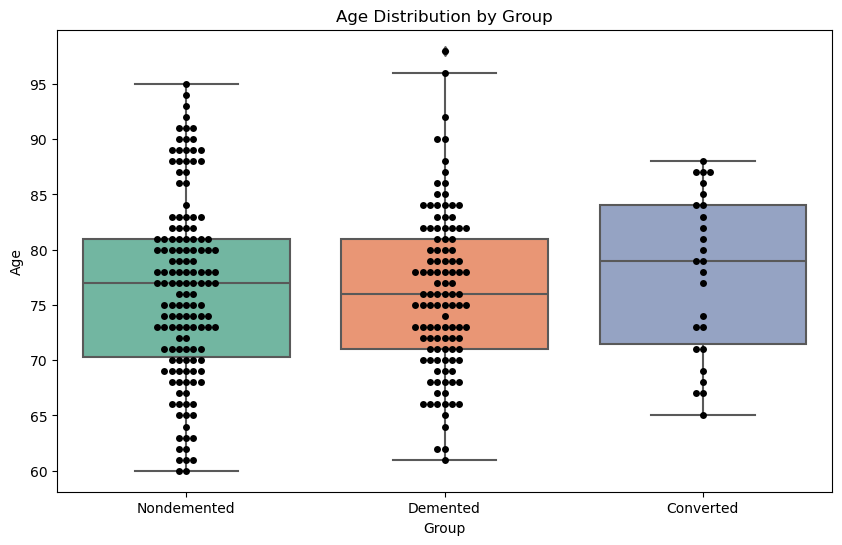

In [9]:
# Visualization for Group and Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Age', data=data, palette="Set2")
sns.swarmplot(x="Group", y="Age", data=data, color='black')
plt.xticks(ticks=[0, 1, 2], labels=['Nondemented', 'Demented', 'Converted'])
plt.title('Age Distribution by Group')
plt.show()

In [10]:
# mixed anova
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=data)
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1325.778      2    134  662.889  56.575    0.000  0.458  nan
Visit          21.639      1    134   21.639   9.001    0.003  0.063    1.000
Interaction    17.716      2    134    8.858   3.685    0.028  0.052  nan



In [11]:
# statistical power for t-tests
effect_size = 0.5
alpha = 0.05
nobs1 = 142
nobs2 = 111
ratio = nobs2 / nobs1
np2 = 0.052
cohen_d = np.sqrt(np2 / (1 - np2))
analysis = TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=ratio, alternative='two-sided')
power

0.9756621679978977

In [12]:
cohen_d

0.2342057229768425

<Axes: xlabel='Group', ylabel='MMSE'>

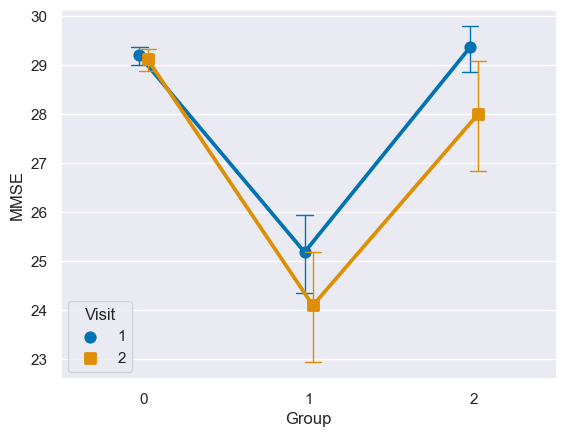

In [13]:
# Create the output plot for the two factors Group and Visit
sns.set()
sns.pointplot(data=data, x="Group", y="MMSE", hue="Visit", dodge=True, markers=["o", "s"], capsize=.1, errwidth=1, palette="colorblind")